## Advance Linear Regression

In [1]:
# Imporitng Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime


from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')


### Data Understanding

In [2]:
# Importing dataset
df=pd.read_csv('train.csv')

In [3]:
#dataframe
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking the shape of dataset
df.shape

(1460, 81)

In [5]:
#chekcing the stats of dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Checking the information of th dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

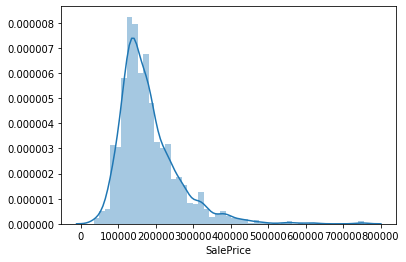

In [7]:
# Checking the distribution of the sale price
sns.distplot(df['SalePrice'])

*From the above graph, we can understand that the sales price is skewed towards left hadn side. So will try to plot the slaes price using the log and check the distribution*

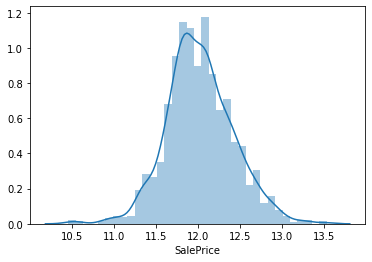

In [8]:
# Checking where distrubution of the sale price with log value
sns.distplot(np.log(df["SalePrice"]))

In [9]:
#Finding Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Data cleaning

In [10]:
# Changing all year columns to their age with year in dataset - current Year, which will help us to understand
#age of each property

today = str(datetime.date.today())
currentYear = int(today[:4])

df.YearBuilt = pd.to_numeric(df.YearRemodAdd, errors='coerce')
df.YearRemodAdd = pd.to_numeric(df.YearRemodAdd, errors='coerce')
df.YrSold = pd.to_numeric(df.YrSold, errors='coerce')
df.GarageYrBlt = pd.to_numeric(df.GarageYrBlt, errors='coerce')

df['AgeYearBuilt'] = currentYear - df['YearBuilt']
df['AgeRemodAdd'] = currentYear - df['YearRemodAdd']
df['AgeSold'] = currentYear - df['YrSold']
df['AgeGarageYrBlt'] = currentYear - df['GarageYrBlt']

# Dropping the original columns
df = df.drop(['YearBuilt', 'YearRemodAdd','YrSold', 'GarageYrBlt'], 1)

In [11]:
# Null value check for Dataset column / varibale wise
df.isna().sum().sort_values(ascending=False)

PoolQC            1453
MiscFeature       1406
Alley             1369
Fence             1179
FireplaceQu        690
LotFrontage        259
GarageCond          81
GarageFinish        81
GarageType          81
AgeGarageYrBlt      81
GarageQual          81
BsmtExposure        38
BsmtFinType2        38
BsmtCond            37
BsmtFinType1        37
BsmtQual            37
MasVnrArea           8
MasVnrType           8
Electrical           1
PavedDrive           0
BldgType             0
SaleType             0
Foundation           0
ExterCond            0
ExterQual            0
SaleCondition        0
SalePrice            0
Exterior2nd          0
Exterior1st          0
RoofMatl             0
                  ... 
PoolArea             0
BsmtFinSF1           0
GarageArea           0
GarageCars           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
Fireplaces           0
Functional           0
TotRmsAbvGrd         0
KitchenQual          0
KitchenAbvGr         0
BedroomAbvG

In [12]:
# percentage of Null value check
((df.isnull().sum()/len(df))*100).sort_values(ascending = False)

PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageCond         5.547945
GarageFinish       5.547945
GarageType         5.547945
AgeGarageYrBlt     5.547945
GarageQual         5.547945
BsmtExposure       2.602740
BsmtFinType2       2.602740
BsmtCond           2.534247
BsmtFinType1       2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493
PavedDrive         0.000000
BldgType           0.000000
SaleType           0.000000
Foundation         0.000000
ExterCond          0.000000
ExterQual          0.000000
SaleCondition      0.000000
SalePrice          0.000000
Exterior2nd        0.000000
Exterior1st        0.000000
RoofMatl           0.000000
                    ...    
PoolArea           0.000000
BsmtFinSF1         0.000000
GarageArea         0.000000
GarageCars         0.000000
OpenPorchSF        0

*Form the given data dictionary we understand that all the Nan values are not true Nan, i.e. few Nan in some variables has some meaning to it. Hence will try to impute it (false Nan) based on the dictionary and then will handle the true Nan values*

In [13]:
#Replacing NA vaule with none where NA means not actual null
false_null=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                 'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

for i in false_null:
    df[i] = df[i].fillna('None')

In [14]:
# Checking Null value after treating the flase null values
((df.isnull().sum()/len(df))*100).sort_values(ascending = False)

LotFrontage       17.739726
AgeGarageYrBlt     5.547945
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493
SaleCondition      0.000000
Foundation         0.000000
RoofMatl           0.000000
Exterior1st        0.000000
Exterior2nd        0.000000
AgeYearBuilt       0.000000
SalePrice          0.000000
ExterQual          0.000000
ExterCond          0.000000
BsmtQual           0.000000
SaleType           0.000000
BsmtCond           0.000000
BsmtExposure       0.000000
BsmtFinType1       0.000000
BsmtFinSF1         0.000000
BsmtFinType2       0.000000
BsmtFinSF2         0.000000
BsmtUnfSF          0.000000
RoofStyle          0.000000
OverallCond        0.000000
OverallQual        0.000000
HouseStyle         0.000000
MSSubClass         0.000000
MSZoning           0.000000
AgeRemodAdd        0.000000
                    ...    
OpenPorchSF        0.000000
EnclosedPorch      0.000000
3SsnPorch          0.000000
ScreenPorch        0.000000
PoolArea           0

*The LotFrontage has 17% missing values and its content is Linear feet of street connected to property. If we try to impute it with mena or median, it might be wrong and may affect out model, so will drop it*

In [15]:
# Dropping the column LotFrontage as there are lot of null value
df.drop("LotFrontage", axis=1, inplace=True)

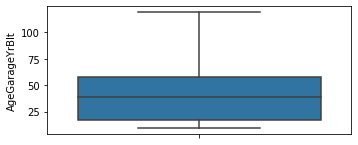

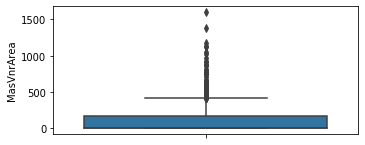

In [16]:
# Plotting the Graph for numerical value which has null values to analyse the outliers
col=['AgeGarageYrBlt','MasVnrArea']
j=0
for i in col:
    plt.figure(figsize=(12,8))
    plt.subplot(3,2,j+1)
    sns.boxplot(y=i,data=df)

*We can understand that AgeGarageYrBlt doesnt have any outliers and can treat the null with mean. For MasVnrArea there are few outliers, so will treat the null values with median*

In [17]:
# Treating null value for numerical column with mean or median
df["AgeGarageYrBlt"].fillna(df["AgeGarageYrBlt"].mean(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

*There are two categrical columns i.e. Electrical and MasVnrType with less that 0.5% missing values, Will impute them with mode*  

In [18]:
# Treating null value for categorical column with mode
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [19]:
# Finding null value percentage after imputing the all nulls
((df.isnull().sum()/len(df))*100).sort_values(ascending = False)

AgeGarageYrBlt    0.0
AgeSold           0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtFinType2      0.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
Exterior1st       0.0
RoofMatl          0.0
RoofStyle         0.0
Utilities         0.0
MSSubClass        0.0
MSZoning          0.0
LotArea           0.0
Street            0.0
Alley             0.0
LotShape          0.0
LandContour       0.0
                 ... 
MiscFeature       0.0
GarageCond        0.0
MiscVal           0.0
MoSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
AgeYearBuilt      0.0
AgeRemodAdd       0.0
PavedDrive        0.0
GarageQual        0.0
2ndFlrSF          0.0
KitchenAbvGr      0.0
LowQualFinSF      0.0
GrLivArea 

### Data Visualization

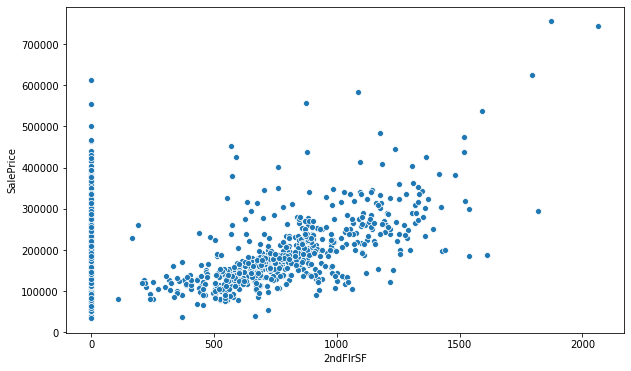

In [20]:
#Will visualize sales price vs 2nd floor
plt.figure(figsize=(10,6))
sns.scatterplot(x="2ndFlrSF", y="SalePrice", data=df)
plt.show()

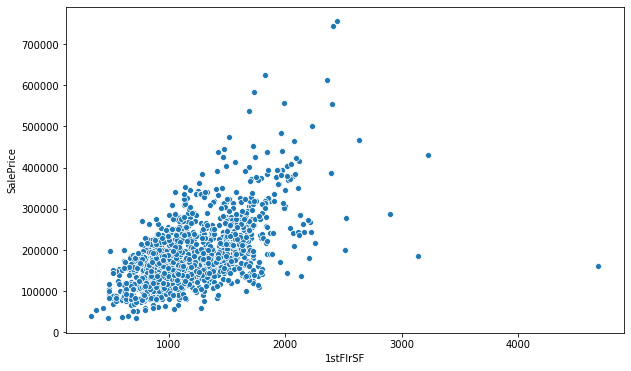

In [21]:
#Will visualize sales price vs 1st floor
plt.figure(figsize=(10,6))
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df)
plt.show()

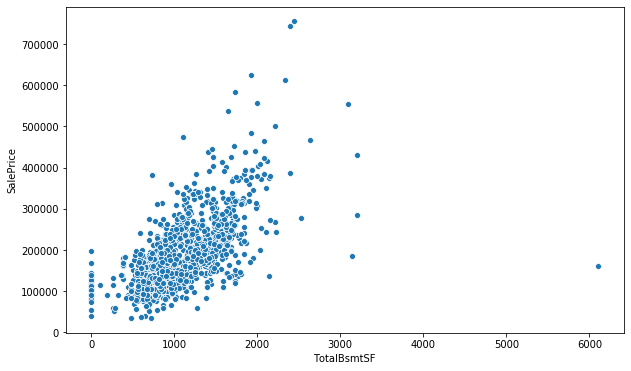

In [22]:
#Will visualize sales price vs TotalBsmtSF
plt.figure(figsize=(10,6))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.show()

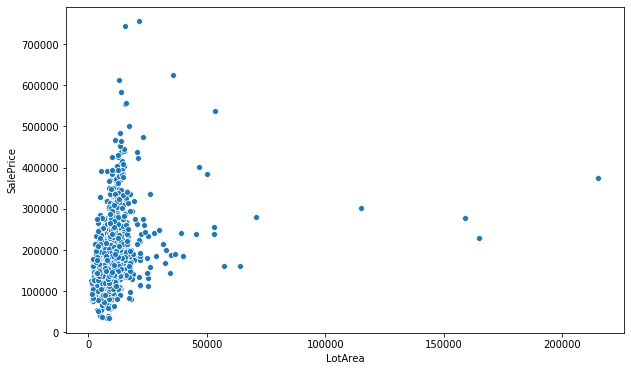

In [23]:
#Will visualize sales price vs LotArea
plt.figure(figsize=(10,6))
sns.scatterplot(x="LotArea", y="SalePrice", data=df)
plt.show()

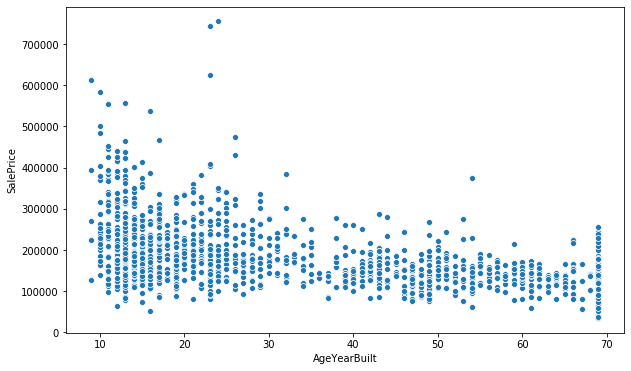

In [24]:
#Will visualize sales price vs AgeYearBuilt
plt.figure(figsize=(10,6))
sns.scatterplot(x="AgeYearBuilt", y="SalePrice", data=df)
plt.show()

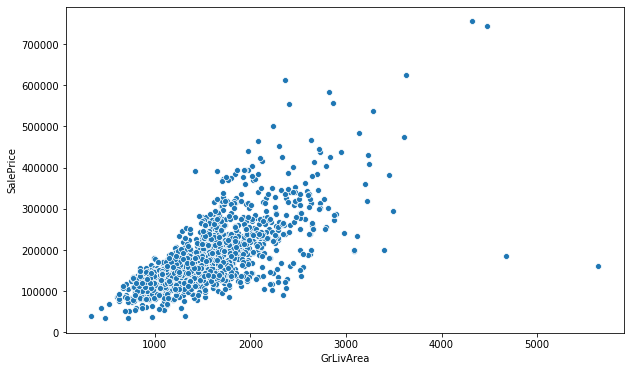

In [25]:
#Will visualize sales price vs GrLivArea
plt.figure(figsize=(10,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.show()

*Form the above plots we can understand that number of floors, TotalBsmtSF and living area is linearly correlated to sales price*

In [26]:
# All numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
0,1,60,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,2,208500,16,16,11,16.0
1,2,20,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,5,181500,43,43,12,43.0
2,3,60,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,9,223500,17,17,11,18.0
3,4,70,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,2,140000,49,49,13,21.0
4,5,60,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,12,250000,19,19,11,19.0


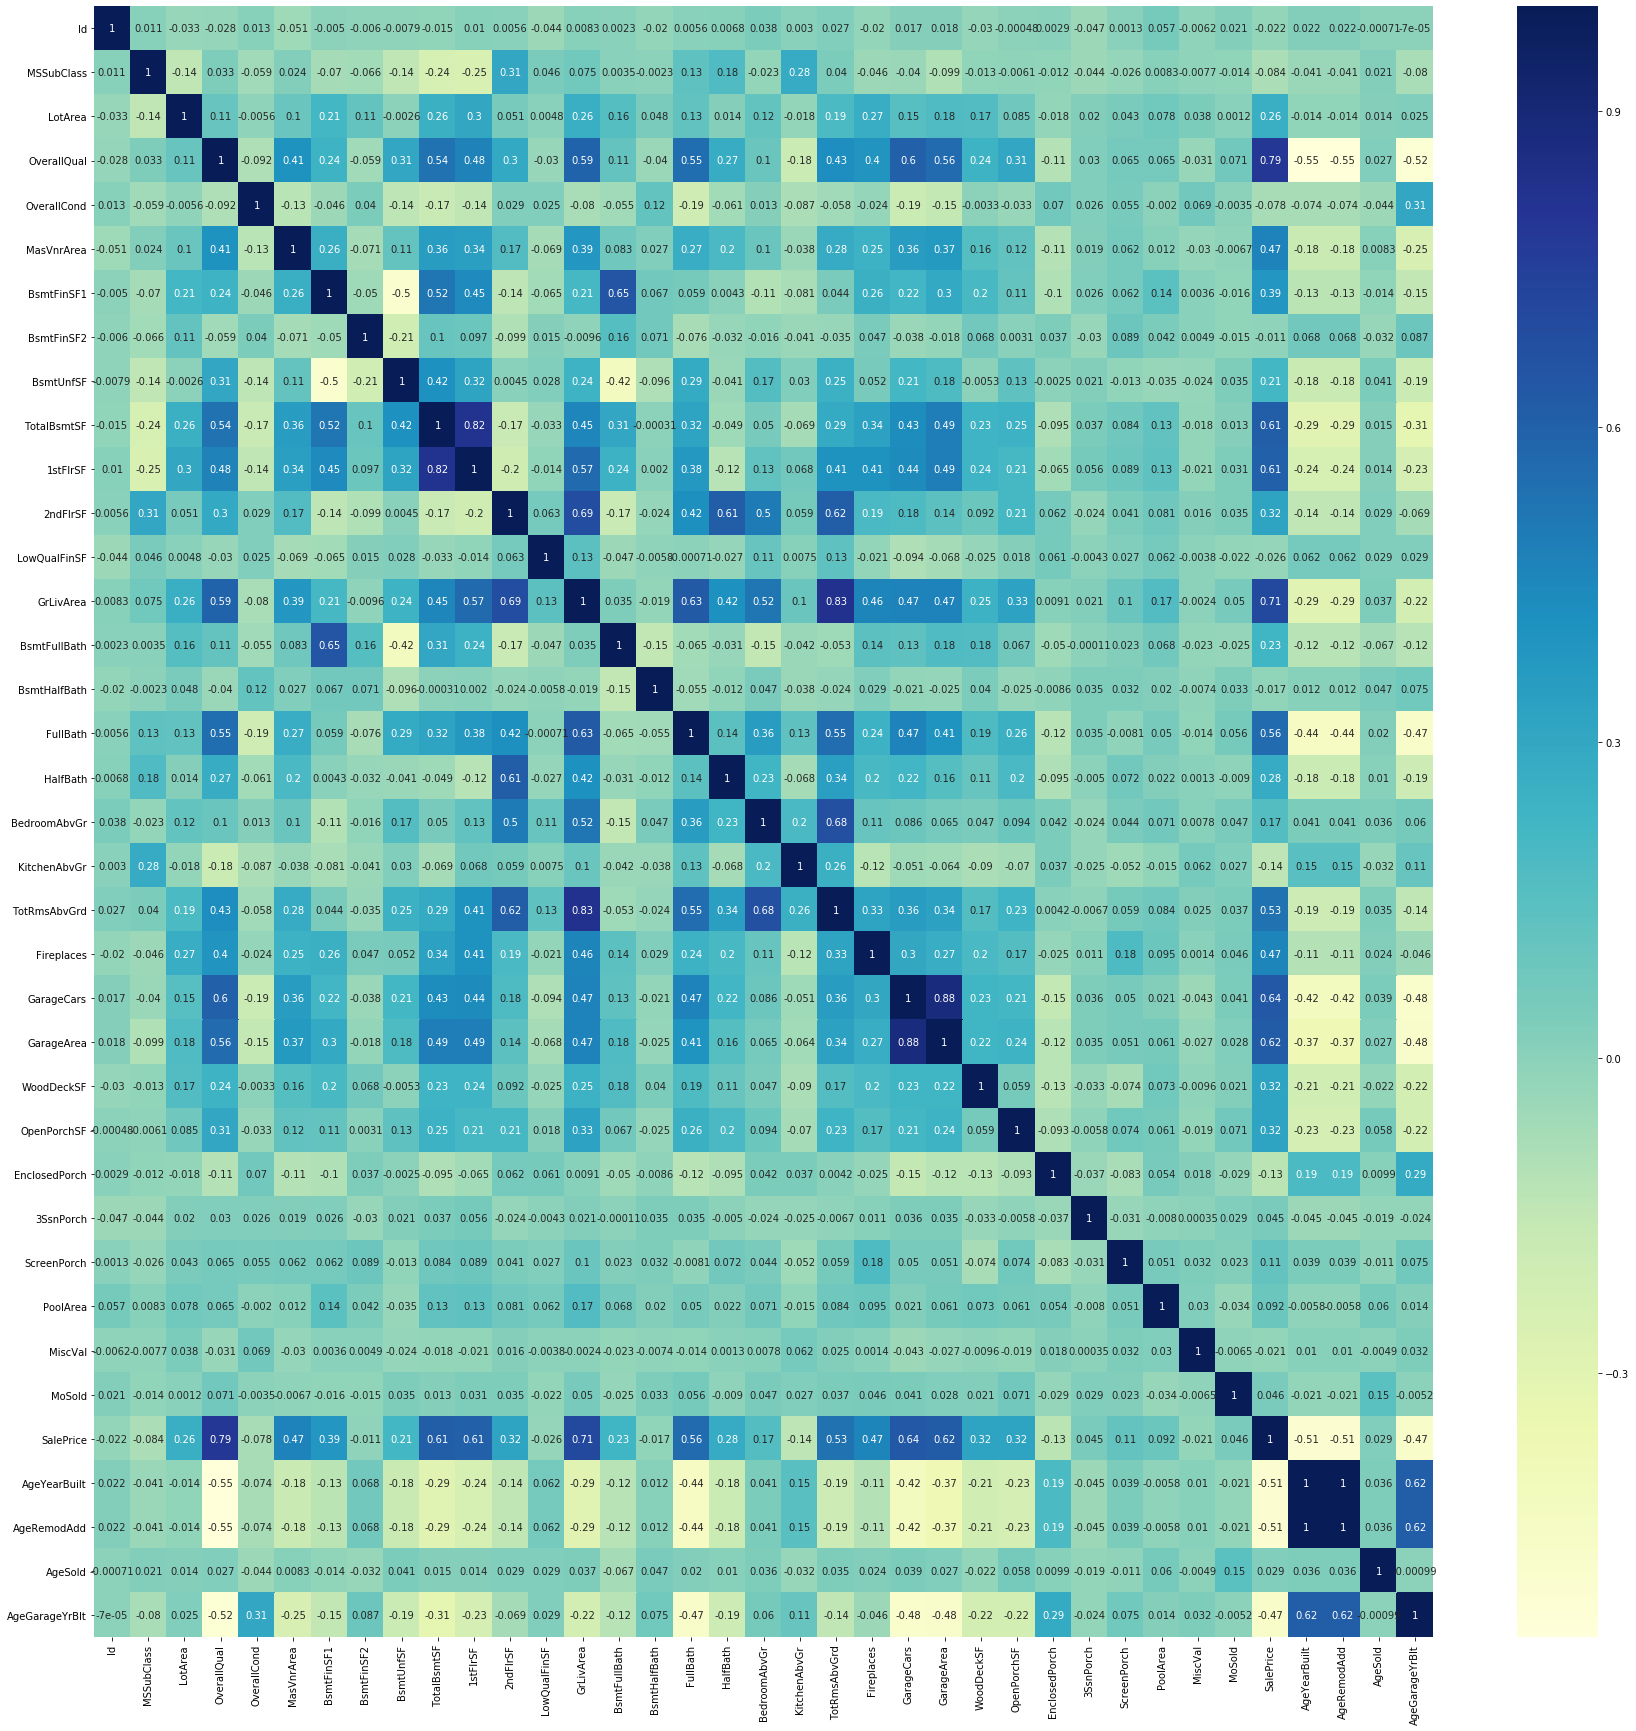

In [27]:
#Visualizing the numeric data with the help of head map using correlation
cor = df_numeric.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Creating Dummies for categorical features

*Creating dummies by assign the numbering for each level in few categorical variables*

In [28]:
df[['LotShape']] = df[['LotShape']].replace({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})
df[['LandSlope']] = df[['LandSlope']].replace({'Gtl': 2, "Mod": 1, "Sev": 0})
df[['Functional']] = df[['Functional']].replace({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 
                                                 'Maj2': 2, 'Sev': 1, 'Sal': 0})
df[['Fence']] = df[['Fence']].replace({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})
df[['BsmtExposure']] = df[['BsmtExposure']].replace({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})
df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].replace({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, 
                                                                                     "LwQ": 2, 'Unf': 1, 'None': 0})
df[['GarageFinish']] = df[['GarageFinish']].replace({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 
    'PoolQC']] = df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                     'GarageCond', 'PoolQC']].replace({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

In [29]:
#Information of the dataset after creating dummies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id                1460 non-null int64
MSSubClass        1460 non-null int64
MSZoning          1460 non-null object
LotArea           1460 non-null int64
Street            1460 non-null object
Alley             1460 non-null object
LotShape          1460 non-null int64
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null int64
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exterior2nd       1460 non-null object
MasVnrType        1460 non-null object
Mas

### Scalling the data

In [30]:
#assigning the sales price to y by removing it form x
X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

In [31]:
# Subset all categorical variables
df_categorical_column = X.select_dtypes(include=['object'])
df_categorical_column.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
#creating dummies 
df_dummies = pd.get_dummies(df_categorical_column, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# Drop categorical variable columns
X = X.drop(list(df_categorical_column.columns), axis=1)

In [34]:
# Concatenate dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [35]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=207)

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Ridge Regression

In [37]:
# list of alphas to tune
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [38]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha'] <= 1000]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017776,0.003575,0.003149,0.000942,0.1,{'alpha': 0.1},-28742.866171,-22141.946493,-22121.158259,-23108.297033,...,-23248.091307,2923.248924,26,-13376.480035,-13326.568075,-14157.364071,-13857.549557,-13369.484323,-13617.489212,332.662228
1,0.011394,0.001601,0.002171,0.000723,0.5,{'alpha': 0.5},-22731.531712,-21999.794032,-22146.749487,-22813.166339,...,-21950.012498,998.619698,25,-13675.380050,-13351.668971,-14182.324367,-13880.712597,-13378.807253,-13693.778648,313.115231
2,0.006540,0.000468,0.001597,0.000490,1,{'alpha': 1.0},-20843.803767,-21890.470235,-22129.275067,-22523.922407,...,-21488.272493,906.307338,24,-13801.535003,-13374.653640,-14200.978476,-13907.332933,-13402.348590,-13737.369729,313.604805
3,0.009353,0.001919,0.001818,0.000441,5,{'alpha': 5.0},-19089.313553,-21651.950542,-22063.678978,-21170.968048,...,-20828.896501,1075.107056,23,-14142.674334,-13428.206715,-14418.404972,-14192.049104,-13736.324914,-13983.532008,354.236555
4,0.008586,0.001022,0.001808,0.000426,20,{'alpha': 20},-19593.986045,-21391.736287,-22231.041493,-19753.283023,...,-20746.242988,993.684567,22,-14850.823359,-13487.543125,-14920.648069,-15029.428392,-14604.942604,-14578.677110,563.107039


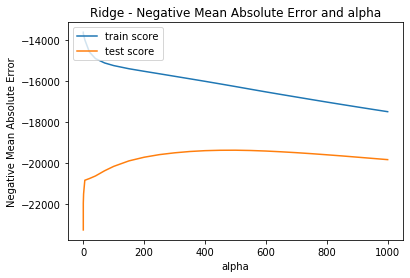

In [39]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
# Checking best parameter (alpha)
ridge_model_cv.best_params_

{'alpha': 500}

In [41]:
#It is confirmed by graph as well
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.92823933e+03,  2.28616985e+03,  3.45715133e+02, -1.07513142e+03,
        8.24804817e+03,  2.52366955e+03,  4.10265753e+03,  4.12458224e+03,
       -1.55067271e+02,  3.71180322e+03, -1.22606665e+03,  5.06306034e+03,
        2.77846031e+03,  2.62636324e+03,  1.06007714e+02,  4.65106000e+02,
        1.72150526e+02,  3.07490558e+03,  1.25993252e+03,  5.49366562e+03,
        4.94780099e+03, -3.64159655e+02,  8.11815847e+03,  2.47034000e+03,
        1.59481592e+02,  3.62025574e+03,  1.89896153e+03,  3.18661133e+02,
       -1.49183684e+03,  4.79146044e+03,  4.27386702e+03,  2.48582997e+03,
        2.92991704e+03,  2.09584069e+03,  4.29949007e+03,  3.24634849e+03,
        6.24893889e+00, -6.23896133e+02,  1.74538875e+03,  9.12609870e+02,
       -5.98100673e+01,  1.01652764e+03,  1.04408420e+03, -2.36136891e+02,
        4.67634946e+02, -1.72853131e+02,  1.13609402e+02, -3.97097749e+02,
       -1.54105652e+03, -1.54105652e+03,  5.07670773e+02, -9.68152223e+02,
        5.09212563e+02,  

In [42]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

In [43]:
mse = np.mean((pred - y_test)**2)
mse

935480093.6597843

In [44]:
ridge.score(X_test,y_test)

0.8546356619871196

In [45]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [46]:
print("Ridge:", pretty_print_linear(ridge.coef_,names=list(X_test),sort=True))


Ridge: 8248.048 * OverallQual + 8118.158 * GrLivArea + 6162.395 * Neighborhood_NoRidge + -5683.1 * Condition2_PosN + 5493.666 * 1stFlrSF + 5491.845 * Neighborhood_NridgHt + 5454.333 * RoofMatl_WdShngl + 5063.06 * BsmtExposure + 4947.801 * 2ndFlrSF + 4791.46 * KitchenQual + 4299.49 * GarageCars + 4273.867 * TotRmsAbvGrd + 4124.582 * ExterQual + 4102.658 * MasVnrArea + 3711.803 * BsmtQual + 3620.256 * FullBath + 3246.348 * GarageArea + 3074.906 * TotalBsmtSF + 2929.917 * FireplaceQu + -2928.239 * MSSubClass + 2778.46 * BsmtFinType1 + 2650.402 * Neighborhood_Crawfor + 2626.363 * BsmtFinSF1 + -2580.621 * Neighborhood_Edwards + 2523.67 * OverallCond + 2485.83 * Fireplaces + 2470.34 * BsmtFullBath + 2297.032 * Neighborhood_StoneBr + 2286.17 * LotArea + 2235.257 * Exterior2nd_ImStucc + 2148.605 * LotConfig_CulDSac + -2125.324 * BldgType_TwnhsE + -2108.923 * BldgType_Twnhs + 2095.841 * GarageFinish + 1928.883 * Condition1_Norm + 1898.962 * HalfBath + 1854.929 * Exterior1st_BrkFace + -1839.218 

### Lasso Regression

In [47]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [48]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.225609,0.019747,0.002580,0.000535,0.1,{'alpha': 0.1},-25414.375789,-22133.170178,-22202.923712,-23228.258788,...,-22620.193969,1727.456448,26,-13527.681622,-13334.489274,-14165.159788,-13865.903987,-13367.768194,-13652.200573,318.164587
1,0.220286,0.032471,0.002712,0.002165,0.5,{'alpha': 0.5},-25365.177018,-22122.916463,-22206.011141,-23221.465960,...,-22605.747235,1714.058295,25,-13531.508049,-13335.928665,-14165.262832,-13866.487845,-13368.406378,-13653.518754,317.577385
2,0.205188,0.022179,0.002788,0.000379,1,{'alpha': 1.0},-25303.634895,-22097.710388,-22193.672149,-23187.471315,...,-22577.000193,1696.798046,24,-13536.312721,-13337.837107,-14165.422802,-13867.239502,-13369.347461,-13655.231919,316.813232
3,0.207620,0.013805,0.002236,0.000745,5,{'alpha': 5.0},-24806.073131,-21921.694757,-22127.485127,-23010.536399,...,-22377.535986,1561.476922,23,-13574.679457,-13359.706084,-14167.144294,-13872.132284,-13375.684212,-13669.869266,309.838644
4,0.199632,0.049539,0.001832,0.000405,20,{'alpha': 20},-22914.834408,-21594.940971,-21888.803373,-22732.103269,...,-21780.605444,1121.927748,22,-13719.190023,-13426.176422,-14199.882269,-13919.901178,-13411.619333,-13735.353845,300.166739


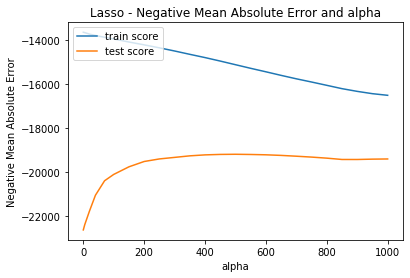

In [49]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Lasso - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
# Checking best parameter (alpha)
lasso_model_cv.best_params_

{'alpha': 500}

In [51]:
#It is confirmed by graph as well

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
lasso.coef_

array([-7.29881170e+03,  3.10327562e+03,  2.03691490e+02, -1.50605756e+02,
        1.38507201e+04,  3.92463629e+03,  3.97726248e+03,  3.97242785e+03,
       -0.00000000e+00,  4.40150668e+03, -2.07249342e+03,  7.59393967e+03,
        2.02351504e+03,  4.45106911e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.41730984e+02,  0.00000000e+00,
        0.00000000e+00, -1.56872427e+03,  3.26290232e+04,  2.78479009e+03,
        0.00000000e+00,  8.97266602e+02,  0.00000000e+00, -1.39940596e+03,
       -1.69329561e+03,  4.57079517e+03,  0.00000000e+00,  8.63107877e+02,
        1.04245884e+03,  1.90964874e+03,  6.19969177e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.04865834e+02,  1.81144120e+02,
       -2.92757863e+02,  5.59012373e+02,  6.68331485e+02,  0.00000000e+00,
        0.00000000e+00, -2.64286133e+01, -0.00000000e+00, -2.62878106e+02,
       -1.23584012e+03, -0.00000000e+00,  0.00000000e+00, -4.39647355e+02,
        0.00000000e+00,  

In [53]:
alpha = 500
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

In [54]:
mse = np.mean((pred - y_test)**2)
mse

1013658850.3634336

In [55]:
lasso.score(X_test,y_test)

0.8424874577742045

In [56]:
print("Lasso:", pretty_print_linear(lasso.coef_,names=list(X_test) ,sort=True))

Lasso: 32629.023 * GrLivArea + 30019.478 * RoofMatl_CompShg + 19657.636 * RoofMatl_WdShngl + 18004.895 * RoofMatl_Tar&Grv + 13850.72 * OverallQual + -12134.66 * Condition2_PosN + 11528.27 * RoofMatl_WdShake + 8245.961 * Neighborhood_NridgHt + 7593.94 * BsmtExposure + -7298.812 * MSSubClass + 6295.428 * Neighborhood_NoRidge + 6213.608 * RoofMatl_Membran + 6199.692 * GarageCars + 5758.926 * RoofMatl_Metal + 5392.478 * RoofMatl_Roll + 4570.795 * KitchenQual + 4451.069 * BsmtFinSF1 + 4401.507 * BsmtQual + 4168.092 * Neighborhood_Somerst + 4136.093 * SaleType_New + 3977.262 * MasVnrArea + 3972.428 * ExterQual + 3924.636 * OverallCond + 3398.731 * Neighborhood_Crawfor + 3103.276 * LotArea + 2784.79 * BsmtFullBath + 2550.739 * Condition1_Norm + 2521.753 * GarageType_None + 2480.073 * Neighborhood_StoneBr + 2397.951 * Functional_7 + 2277.823 * HouseStyle_1Story + -2268.107 * Exterior2nd_Wd Shng + 2232.065 * Exterior1st_BrkFace + -2178.026 * Heating_OthW + 2175.33 * LotConfig_CulDSac + -2072.49

### Lasso Regression after removing top features

In [57]:
X_train_ART_Feature = X_train.drop(['OverallQual','GrLivArea','Neighborhood_NoRidge','1stFlrSF','Neighborhood_NridgHt'], axis=1)

X_test_ART_Feature = X_test.drop(['OverallQual','GrLivArea','Neighborhood_NoRidge','1stFlrSF','Neighborhood_NridgHt'], axis=1)

In [58]:
lasso = Lasso()

# cross validation
ARTF_lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

ARTF_lasso_model_cv.fit(X_train_ART_Feature, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   11.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [59]:
ARTF_lasso_cv_results = pd.DataFrame(ARTF_lasso_model_cv.cv_results_)
ARTF_lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.225959,0.014629,0.002206,0.000394,0.1,{'alpha': 0.1},-27731.231272,-24486.954906,-24608.831755,-24682.176374,...,-24772.603966,1721.586990,26,-14987.038043,-15018.541663,-15501.956756,-15630.807206,-15058.470637,-15239.362861,271.048350
1,0.196693,0.054902,0.002780,0.000420,0.5,{'alpha': 0.5},-27670.261709,-24465.623939,-24600.463920,-24720.128836,...,-24762.286183,1700.803163,25,-14991.813036,-15020.954306,-15501.329384,-15632.262042,-15059.833647,-15241.238483,269.886120
2,0.221385,0.028395,0.002243,0.000424,1,{'alpha': 1.0},-27594.767648,-24422.210593,-24587.864268,-24703.076517,...,-24733.008553,1676.083662,24,-14997.688421,-15023.710212,-15500.524493,-15634.097546,-15061.330663,-15243.470267,268.531033
3,0.211856,0.040578,0.002201,0.000364,5,{'alpha': 5.0},-27070.522358,-24237.343252,-24550.066461,-24570.943256,...,-24556.106904,1507.188901,23,-15046.956631,-15051.273248,-15505.247948,-15649.889321,-15072.408186,-15265.155067,259.296119
4,0.163759,0.002481,0.001838,0.001010,20,{'alpha': 20},-25182.450340,-23903.732346,-24305.302374,-24337.635187,...,-23988.006629,983.653580,22,-15177.963837,-15109.331804,-15495.882975,-15696.510302,-15145.428012,-15325.023386,231.343639


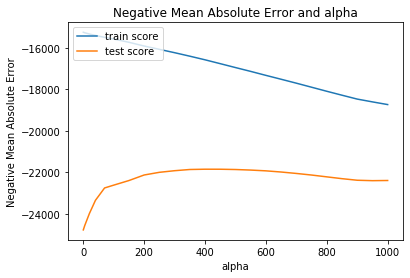

In [60]:
# plotting mean test and train scoes with alpha 
ARTF_lasso_cv_results['param_alpha'] = ARTF_lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ARTF_lasso_cv_results['param_alpha'], ARTF_lasso_cv_results['mean_train_score'])
plt.plot(ARTF_lasso_cv_results['param_alpha'], ARTF_lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
# Checking best parameter (alpha)
ARTF_lasso_model_cv.best_params_

{'alpha': 400}

In [62]:
#It is confirmed by graph as well

alpha = 400

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_ART_Feature, y_train)

Lasso(alpha=400, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
alpha = 400
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_ART_Feature, y_train)

pred = lasso.predict(X_test_ART_Feature)

In [64]:
mse = np.mean((pred - y_test)**2)
mse

1100401580.5209875

In [65]:
lasso.score(X_test_ART_Feature,y_test)

0.8290084969366172

In [66]:
print("Lasso:", pretty_print_linear(lasso.coef_,names=list(X_test_ART_Feature) ,sort=True))

Lasso: 50210.909 * RoofMatl_CompShg + 32256.87 * RoofMatl_Tar&Grv + 30459.784 * RoofMatl_WdShngl + 23931.377 * 2ndFlrSF + 22222.123 * RoofMatl_WdShake + 18747.619 * TotalBsmtSF + -12474.424 * Condition2_PosN + 10738.045 * RoofMatl_Membran + 9844.01 * RoofMatl_Metal + 9114.779 * RoofMatl_Roll + 8352.616 * TotRmsAbvGrd + 7897.488 * BsmtExposure + 7552.831 * ExterQual + 7175.681 * MasVnrArea + 7134.761 * KitchenQual + -6428.857 * MSSubClass + 6370.804 * BsmtFinSF1 + -6019.483 * BsmtCond + 5830.833 * OverallCond + 5727.758 * BsmtQual + -5396.72 * Neighborhood_CollgCr + 5128.145 * GarageArea + 4915.55 * GarageCars + -4449.256 * Neighborhood_NAmes + -4233.922 * Neighborhood_Edwards + -4074.531 * Neighborhood_Gilbert + 4018.603 * FullBath + 3790.969 * Exterior1st_BrkFace + 3785.274 * SaleType_New + 3722.266 * Foundation_Slab + 3344.991 * LotArea + -3168.111 * RoofStyle_Gable + -3023.488 * KitchenAbvGr + -2902.517 * Neighborhood_Mitchel + -2805.425 * HouseStyle_2Story + 2759.016 * FireplaceQu 